## Plotting Ventolin Trends

In [428]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from wordcloud import WordCloud


In [429]:
final_df = pd.read_csv('../final dataset/Ventolin_df.csv', index_col= 'Unnamed: 0')

## Demographic Plots

Number of Reports by Age Group

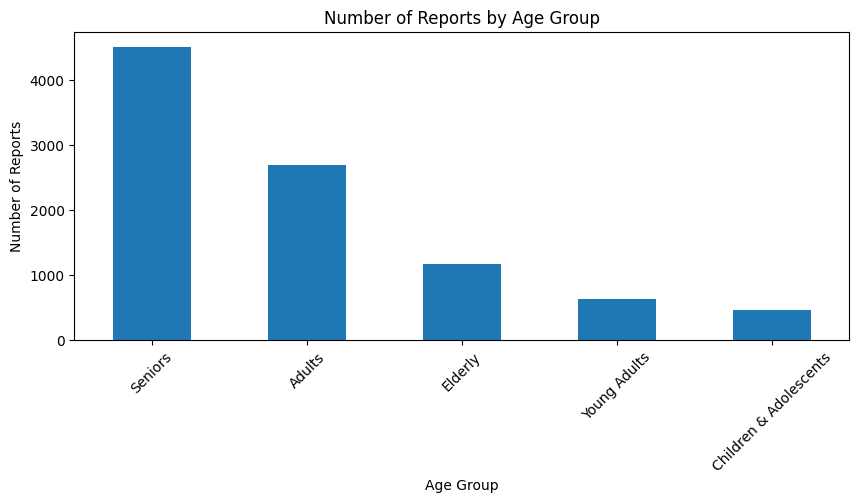

In [431]:
# Count the number of reports in each age group
age_group_counts = final_df['age_category'].value_counts()

# Plot the counts
age_group_counts.plot(kind='bar', figsize=(10, 4))
plt.title('Number of Reports by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()


distribution of vetolin by age

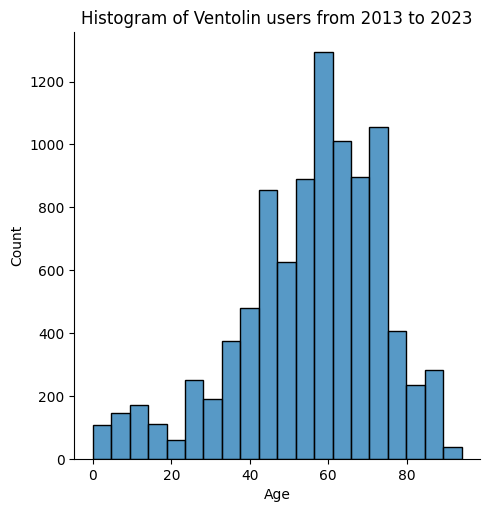

In [432]:
sns.displot((final_df['age']), bins = 20)
plt.xlabel('Age')
plt.title('Histogram of Ventolin users from 2013 to 2023')
plt.show()

In [626]:
print('mean =', final_df['age'].mean())
print('median =', final_df['age'].median())


mean = 55.35363482671175
median = 59.0


distribution of vetolin by report source

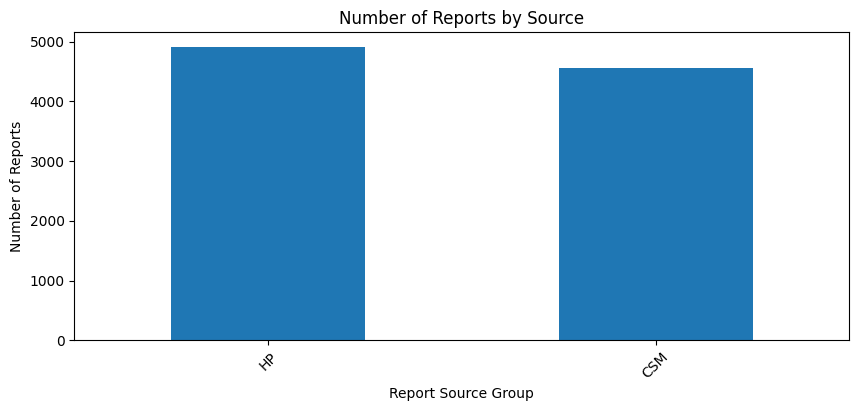

In [434]:
# Count the number of reports in each age group
age_group_counts = final_df['rpsr_cod'].value_counts()

# Plot the counts
age_group_counts.plot(kind='bar', figsize=(10, 4))
plt.title('Number of Reports by Source')
plt.xlabel('Report Source Group')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()


## Proportion Plots

#### Proportion of top 10 adverse events

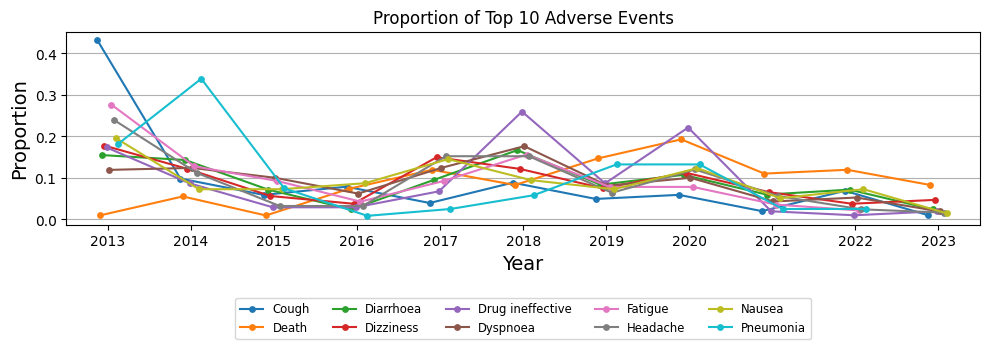

In [435]:
# Count occurrences of each 'pt' value across its lifetime
lifetime_counts = final_df['pt'].value_counts()

# Get the top 10 'pt' values
top_10_pt = lifetime_counts.head(10).index

# Filter dataframe to include only the top 10 'pt' values
df_top_10 = final_df[final_df['pt'].isin(top_10_pt)]

# Count occurrences of each 'pt' value by year
pt_by_year = df_top_10.groupby(['year', 'pt']).size().reset_index(name='count')

# Calculate lifetime counts for the top 10 'pt' values
lifetime_counts_top_10 = df_top_10['pt'].value_counts().reindex(top_10_pt)

# Map the lifetime counts to the yearly data
pt_by_year['lifetime_count'] = pt_by_year['pt'].map(lifetime_counts_top_10)

# Calculate proportions
pt_by_year['proportion'] = pt_by_year['count'] / pt_by_year['lifetime_count']

# Plot using Seaborn's pointplot
plt.figure(figsize=(10, 4))
sns.pointplot(data=pt_by_year, x='year', y='proportion', hue='pt', markers='o', linestyles='-', dodge=True, linewidth=1.5)

plt.xlabel('Year', size=14)
plt.ylabel('Proportion', size=14)
plt.title('Proportion of Top 10 Adverse Events')

# Adjust the legend
plt.legend(bbox_to_anchor=(0.5, -0.35), loc='upper center', fontsize='small', title_fontsize='12', ncol=5)

plt.grid(True, which='both', axis='y')  # Only horizontal gridlines are shown
plt.tight_layout()  # Adjust layout to make room for the legend
# plt.xticks(size=12)
# plt.yticks(size=12)
plt.show()


#### Proportion of top 10 adverse event categories

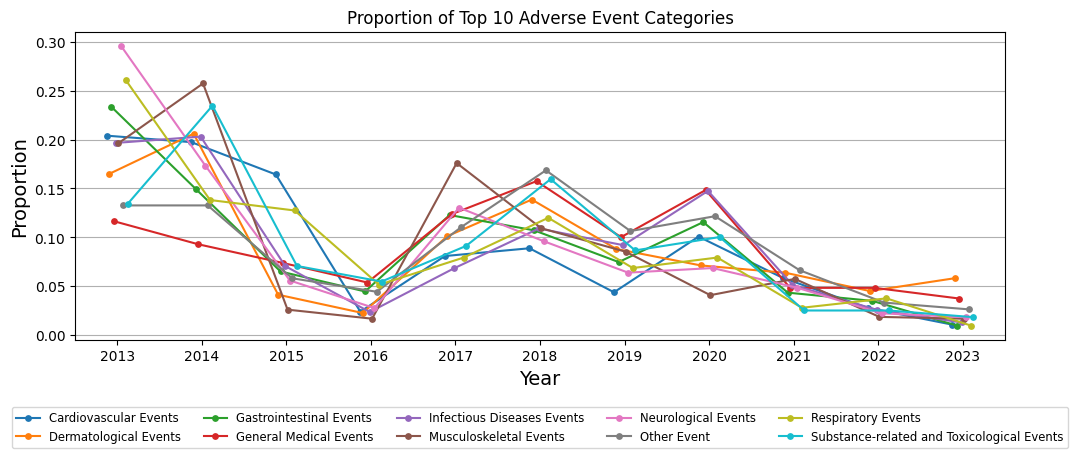

In [437]:
# Get value counts for the filtered DataFrame
pt_counts = final_df['pt_category'].value_counts()

# Get the top 10 'pt_category' values
top_10_pt = pt_counts.head(10).index

# Filter dataframe to include only the top 10 'pt_category' values
df_top_10 = final_df[final_df['pt_category'].isin(top_10_pt)]

# Count occurrences of each 'pt_category' value by year
pt_by_year = df_top_10.groupby(['year', 'pt_category']).size().reset_index(name='count')

# Calculate lifetime counts for the top 10 'pt_category' values
lifetime_counts_top_10 = df_top_10['pt_category'].value_counts().reindex(top_10_pt)

# Map the lifetime counts to the yearly data
pt_by_year['lifetime_count'] = pt_by_year['pt_category'].map(lifetime_counts_top_10)

# Calculate proportions
pt_by_year['proportion'] = pt_by_year['count'] / pt_by_year['lifetime_count']

# Plot using Seaborn's pointplot
plt.figure(figsize=(12, 4))
sns.pointplot(data=pt_by_year, x='year', y='proportion', hue='pt_category', markers='o', linestyles='-', dodge=True, linewidth=1.5)

plt.xlabel('Year', size=14)
plt.ylabel('Proportion', size=14)
plt.title('Proportion of Top 10 Adverse Event Categories')

# Adjust the legend
plt.legend(bbox_to_anchor=(0.5, -0.20), loc='upper center', fontsize='small', title_fontsize='13', ncol=5)

# Remove vertical gridlines
plt.grid(True, which='both', axis='y')  # Only horizontal gridlines are shown

# plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


#### Proportion of Reports by Age categories

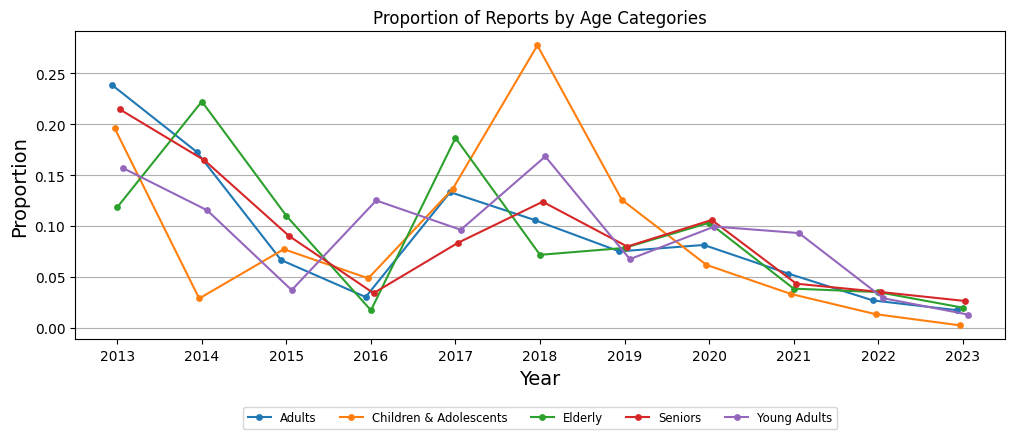

In [559]:
# Get value counts for the filtered DataFrame
age_counts = final_df['age_category'].value_counts()

# Get the top 10 'pt_category' values
top_10_age = age_counts.head(10).index

# Filter dataframe to include only the top 10 'pt_category' values
df_top_10 = final_df[final_df['age_category'].isin(top_10_age)]

# Count occurrences of each 'pt_category' value by year
age_by_year = df_top_10.groupby(['year', 'age_category']).size().reset_index(name='count')

# Calculate lifetime counts for the top 10 'pt_category' values
lifetime_counts_top_10 = df_top_10['age_category'].value_counts().reindex(top_10_age)

# Map the lifetime counts to the yearly data
age_by_year['lifetime_count'] = age_by_year['age_category'].map(lifetime_counts_top_10)

# Calculate proportions
age_by_year['proportion'] = age_by_year['count'] / age_by_year['lifetime_count']

# Plot using Seaborn's pointplot
plt.figure(figsize=(12, 4))
sns.pointplot(data=age_by_year, x='year', y='proportion', hue='age_category', markers='o', linestyles='-', dodge=True, linewidth=1.5)

plt.xlabel('Year', size=14)
plt.ylabel('Proportion', size=14)
plt.title('Proportion of Reports by Age Categories')

# Adjust the legend
plt.legend(bbox_to_anchor=(0.5, -0.20), loc='upper center', fontsize='small', title_fontsize='13', ncol=5)

# Remove vertical gridlines
plt.grid(True, which='both', axis='y')  # Only horizontal gridlines are shown

# plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


## Total Reports

#### Total Ventolin Adverse Event Reports Per Year

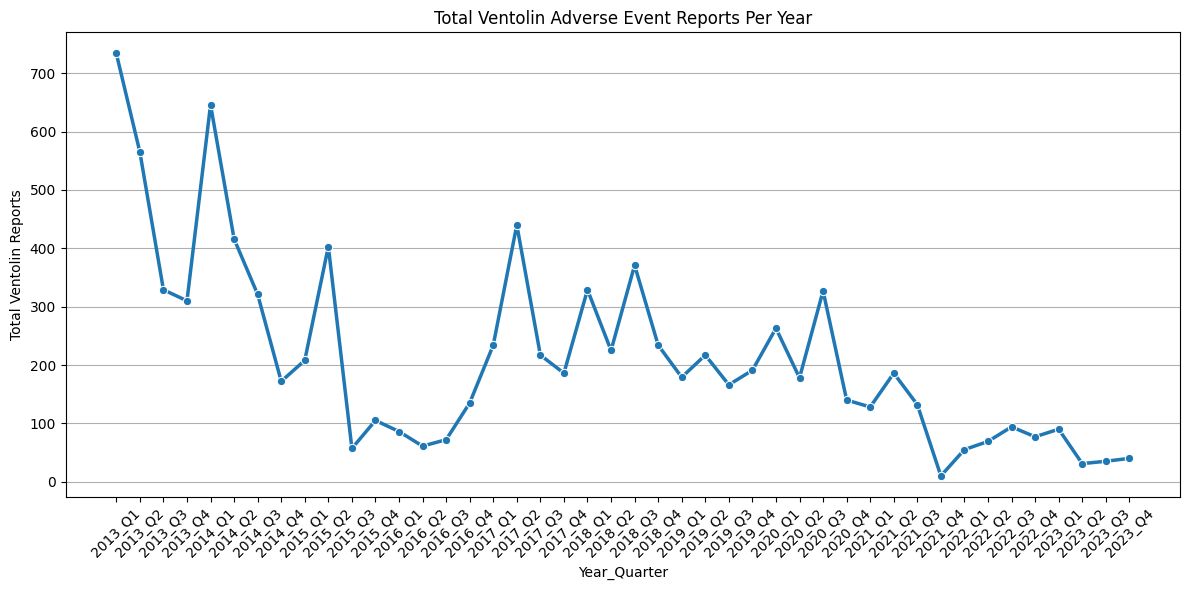

In [438]:
# Count total occurrences of 'pt' per year
total_pt_per_year = final_df.groupby('year_quarter').size().reset_index(name='total_pt')

# Plot using Seaborn's lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_pt_per_year, x='year_quarter', y='total_pt', marker='o', linewidth=2.5)

plt.xlabel('Year_Quarter')
plt.ylabel('Total Ventolin Reports')
plt.title('Total Ventolin Adverse Event Reports Per Year')

plt.grid(True, which='both', axis='y')  # Show gridlines for both axes
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels and title

plt.show()


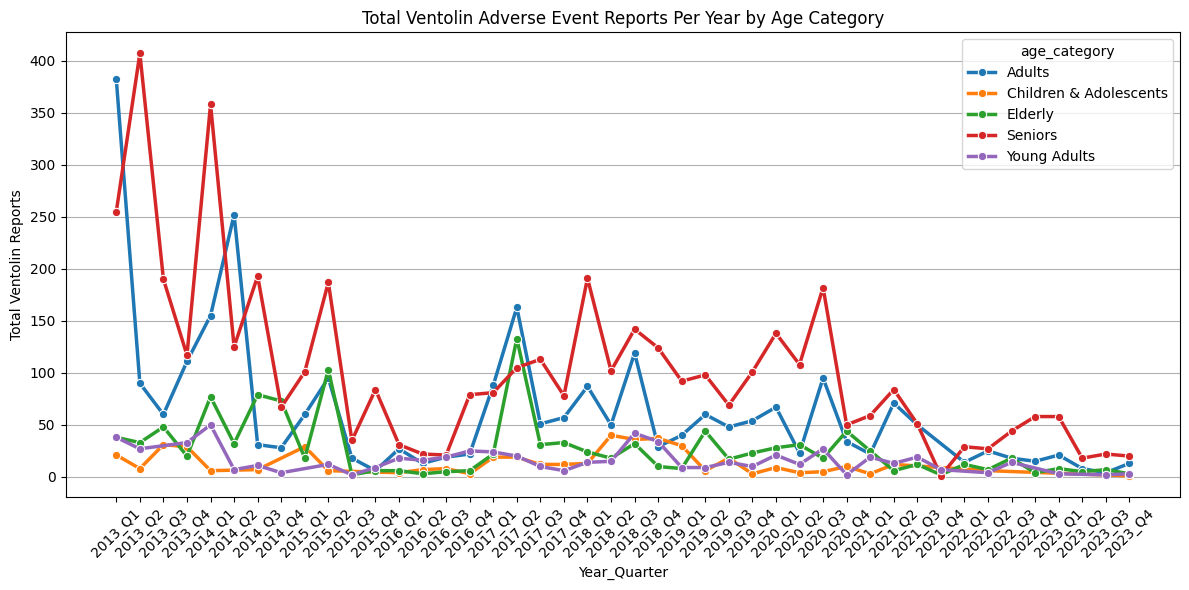

In [439]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' includes 'year_quarter', 'pt', and 'age_categories'
# Count total occurrences of 'pt' per year_quarter and age_category
total_pt_per_year_age = final_df.groupby(['year_quarter', 'age_category']).size().reset_index(name='total_pt')

# Plot using Seaborn's lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_pt_per_year_age, x='year_quarter', y='total_pt', hue='age_category', marker='o', linewidth=2.5)

plt.xlabel('Year_Quarter')
plt.ylabel('Total Ventolin Reports')
plt.title('Total Ventolin Adverse Event Reports Per Year by Age Category')

plt.grid(True, which='both', axis='y')  # Show gridlines for both axes
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels and title

plt.show()


## WordCloud Plots - Top Adverse Events

#### Word cloud for top 30 adverse events

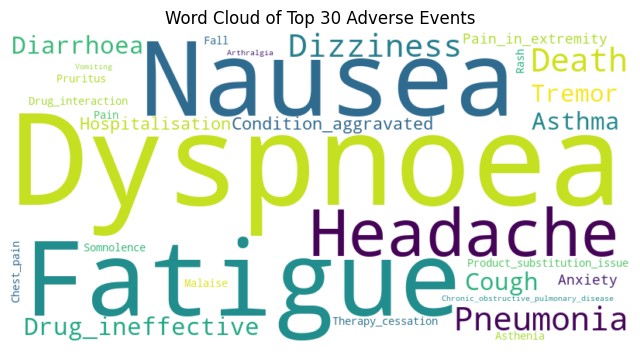

In [507]:
# Get the top 10 'pt' values
top_10_pt = final_df['pt'].value_counts().head(30).index

# Filter the dataframe to include only the top 10 'pt' values
df_top_10 = final_df[final_df['pt'].isin(top_10_pt)]

# Count occurrences of each top 10 'pt' value
pt_counts = df_top_10['pt'].value_counts()

# Create a string for word cloud, joining multi-word phrases with '_'
pt_text = ' '.join([pt.replace(' ', '_') for pt in pt_counts.index])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(pt_text)

# Plot the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Top 30 Adverse Events')
plt.show()


#### Word cloud of top 30 adverse events by age category

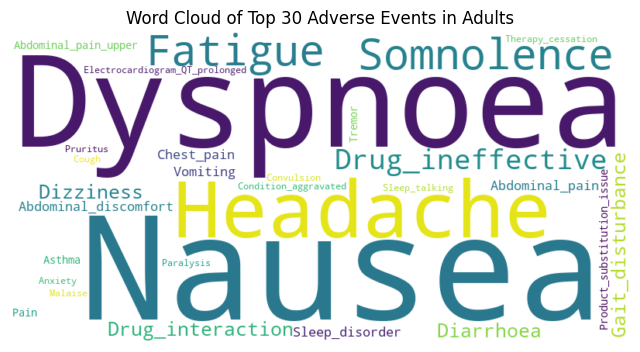

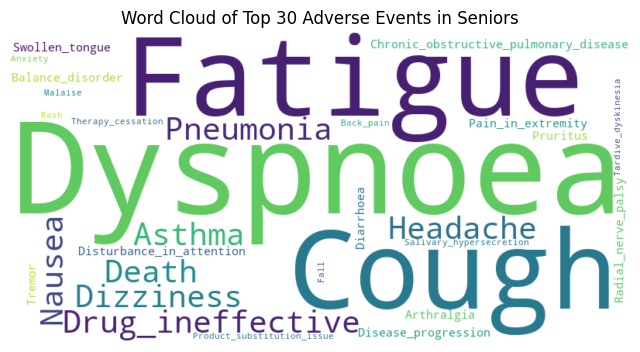

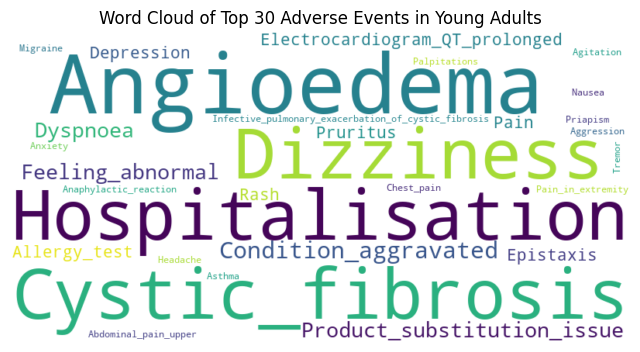

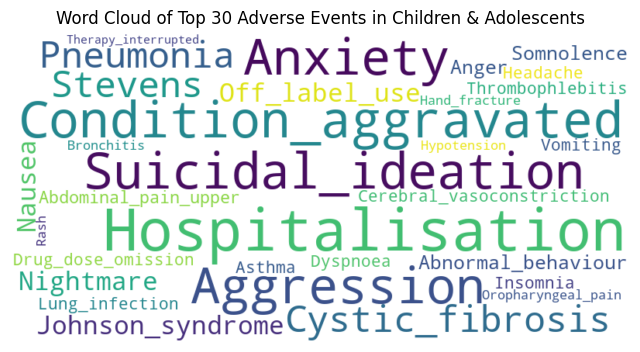

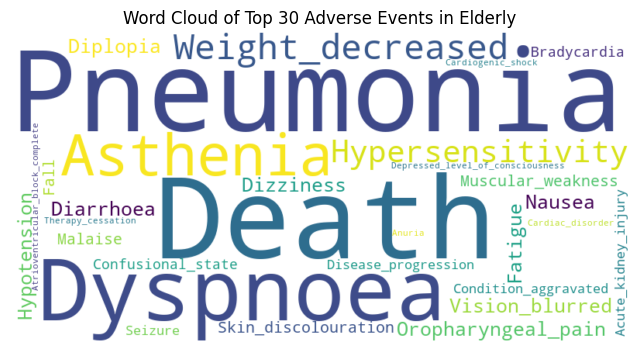

In [506]:
# Define unique age categories
age_categories = final_df['age_category'].unique()

# Plot a word cloud for each age category
for age_category in age_categories:
    # Filter the dataframe for the current age category
    df_age_category = final_df[final_df['age_category'] == age_category]
    
    # Get the top 10 'pt' values for this age category
    top_10_pt = df_age_category['pt'].value_counts().head(30).index

    # Filter the dataframe to include only the top 10 'pt' values
    df_top_10 = df_age_category[df_age_category['pt'].isin(top_10_pt)]

    # Count occurrences of each top 10 'pt' value
    pt_counts = df_top_10['pt'].value_counts()

    # Create a string for word cloud, joining multi-word phrases with '_'
    pt_text = ' '.join([pt.replace(' ', '_') for pt in pt_counts.index])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(pt_text)

    # Plot the word cloud
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Word Cloud of Top 30 Adverse Events in {age_category}')
    plt.show()


#### Word cloud of top 10 adverse events by sex category

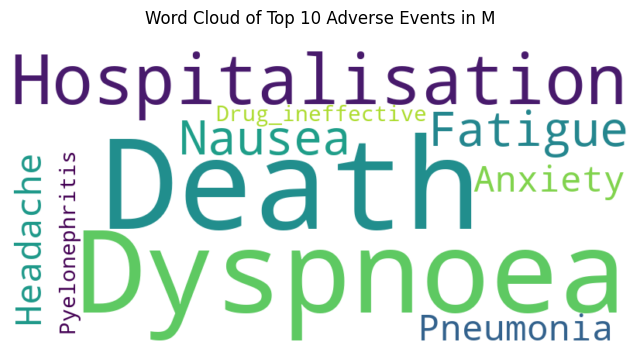

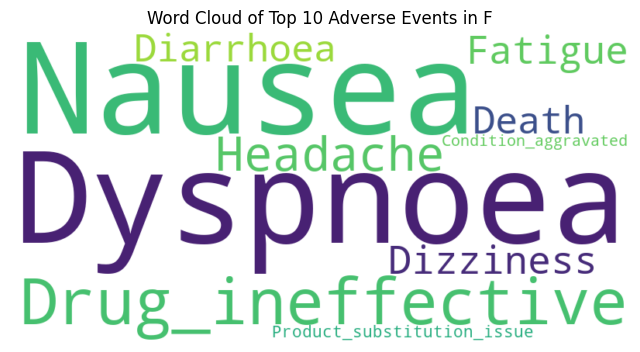

In [500]:
# Define unique sex categories
gndr_categories = final_df[(final_df['sex'] == 'M') | (final_df['sex'] == 'F')]['sex'].unique()

# Plot a word cloud for each sex category
for gndr_category in gndr_categories:
    # Filter the dataframe for the current sex category
    df_gndr_category = final_df[final_df['sex'] == gndr_category]
    
    # Get the top 10 'pt' values for this sex category
    top_10_gndr = df_gndr_category['pt'].value_counts().head(10).index

    # Filter the dataframe to include only the top 10 'pt' values
    df_top_10 = df_gndr_category[df_gndr_category['pt'].isin(top_10_gndr)]

    # Count occurrences of each top 10 'pt' value
    pt_counts = df_top_10['pt'].value_counts()

    # Create a string for word cloud, joining multi-word phrases with '_'
    pt_text = ' '.join([pt.replace(' ', '_') for pt in pt_counts.index])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(pt_text)

    # Plot the word cloud
    plt.figure(figsize=(8, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Hide axes
    plt.title(f'Word Cloud of Top 10 Adverse Events in {gndr_category}')
    plt.show()
